# Austin Texas: Determining the Best Neighborhoods to Locate a Restaurant Business

## Problem Description and Background

There are several important factors to consider in making the decision on where to locate a restaurant business, having in mind that location can affect cost and profit, and also taking note of the fact that profit maximization is the primary goal of most businesses.

It is important to undertake a surrounding business and competitor analysis in determining the location of the business. Are businesses in the area doing well? Are people and businesses in the area affluent? What is the average income of people in the area? What types of restaurants are in the area? If, for example, there are already six barbeque restaurants in the neighborhood, it may not make business sense to establish another in the neighborhood.
If there is a night club in the neighborhood it might be expedient to situate a restaurant that caters for after hour crowd after they are done with night drinking and clubbing.

Visibility and accessibility are also vital considerations; one would want not a location in a side street with very little foot traffic and one would prefer a location accessible to car traffic, parking space should, for instance be available.

What about the cost   of the space? Is it affordable? Will it sustain or consume profit? Is there enough space to accommodate your vision?

What is the crime rate in the neighborhood? You would not want crime to chase away your customers. What is the population density of the neighborhood?. What are the demographics in terms of age, gender, employment, unemployment, underemployment, income bracket? How accessible are the sources of food supply?
These questions and considerations are within the purview of location data to answer. This is precisely what this project is about, using data to analyze, provide insight and provide solution. 

We chose Austin, Texas, USA as the location to base our analysis of this project. The choice is informed by the fact that Austin, Texas was ranked as the 2019 best city in the USA to live in, according to U.S. News & World Report’s 125 Best Places to Live in the USA. 



## Target Audience

This project is for investors who are looking for prospects to invest in, particularly for entrepreneurs who want to invest in restaurant business in the United States of America but are curious of where best to locate it. The information here, though targeted at restaurant business are also useful for other businesses.

Startups would find this information also invaluable.

Data scientist, particularly beginners will gain insights into real world application of data science.


## Data Description and Methodology

1. The major dataset used for this project is sourced from 'https://data.austintexas.gov/Building-and-Development/Neighborhood-Reporting-Areas-Zoning-Acres/npuf-crwm'
2. Google maps is used  to derive the latitude and longitude coodinates of the Neighborhoods in Austin, Texas.
3. The Foursquare API was used to provide location data of venues and allied information in the neighborhoods.

This project uses an unsupervised learning approach, which uses data to identify patterns and information about major trends in the very dynamic restaurant industry in Austin neighborhoods, this is with a view to also provide insight into some atypical behaviors that are unique to Austin restaurant business, which are more evident in view of the new realities introduced by the Covid-19 pandemic. The K-means analytic clustering algorithm will be used to segment restaurants into clusters with a view to identifying the best clusters to locate what type of restaurant as prescrided by the analysis.

### Import Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import requests
import pandas as pd
from bs4 import BeautifulSoup as bs
import csv

### Read Austin Neighborhood Dataset

In [2]:
df = pd.read_excel("Neighborhood.xlsx")
df.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,"Population and Housing, Table I",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,by Neighborhood Reporting Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Census 2010 Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Map of Neighborhood Reporting Areas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,http://www.austintexas.gov/sites/default/files...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Percent,NaN,Gross,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Owner,NaN,Population,NaN,NaN


## Data Wrangling

### Drop Unnecessary rows

In [3]:
df.drop(df.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]], inplace=True)
df


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
16,NaN,ALLENDALE,29.6855,-95.2132,6643,0.831703,0.0189673,0.10974,0.0189673,0.0206232,NaN,3612,3263,349,0.641128,NaN,5.09635,60,1303.48
17,NaN,ANDERSON MILL,30.4558,-97.8071,28473,0.647455,0.0332947,0.131107,0.163277,0.0248657,NaN,11507,10904,603,0.672872,NaN,4.98966,62,5706.4
18,NaN,AVERY RANCH--LAKELINE,30.4901,-97.8249,14785,0.58485,0.0395671,0.140615,0.206628,0.0283395,NaN,6108,5681,427,0.605351,NaN,3.18547,74,4641.39
19,NaN,BARTON CREEK MALL,30.2577,-97.8094,5147,0.793472,0.00816009,0.0922868,0.0866524,0.0194288,NaN,2195,2076,119,0.637283,NaN,2.22036,84,2318.09
20,NaN,BARTON HILLS,30.2532,-97.8207,8022,0.78372,0.0138369,0.135627,0.0433807,0.0234356,NaN,4965,4614,351,0.313827,NaN,3.93603,70,2038.1
21,NaN,BERGSTROM,30.1975,-97.6685,179,0.513966,0.273743,0.212291,0,0,NaN,2,0,2,na,NaN,0.0377255,101,4744.8
22,NaN,BLUFF SPRINGS,30.1726,-97.7708,23000,0.175696,0.0798696,0.71587,0.0106957,0.0178696,NaN,7947,7362,585,0.53586,NaN,2.72776,81,8431.82
23,NaN,BOULDIN,30.1726,-97.7708,5510,0.585118,0.0526316,0.327586,0.0137931,0.0208711,NaN,2949,2694,255,0.404232,NaN,7.12575,38,773.252
24,NaN,BRENTWOOD,30.3295,-97.7481,7513,0.731798,0.0270198,0.177026,0.0397977,0.0243578,NaN,4401,4127,274,0.402956,NaN,7.41134,32,1013.72
25,NaN,BRODIE LANE,30.1902,-97.8477,10913,0.619353,0.0428846,0.272519,0.0401356,0.0251077,NaN,4939,4770,169,0.584067,NaN,5.68311,52,1920.25


### Drop Unnecessary Columns  and RenameColumns

In [4]:
df.columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']

In [5]:
df.drop(['1','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19'],axis=1,inplace=True)

In [6]:
df.rename({'2':'Neighborhood', '3':'latitude','4':'longitude'},axis=1, inplace=True)


In [7]:
df.head(2)

,Neighborhood,latitude,longitude
16,ALLENDALE,29.6855,-95.2132
17,ANDERSON MILL,30.4558,-97.8071


### Instantiate   Nominatim object to retrieve geographic coordinates for Austin.


In [8]:
address = 'Austin, TX, USA'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Austin, TX, USA are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Austin, TX, USA are 30.2711286, -97.7436995.


In [9]:
df

,Neighborhood,latitude,longitude
16,ALLENDALE,29.6855,-95.2132
17,ANDERSON MILL,30.4558,-97.8071
18,AVERY RANCH--LAKELINE,30.4901,-97.8249
19,BARTON CREEK MALL,30.2577,-97.8094
20,BARTON HILLS,30.2532,-97.8207
21,BERGSTROM,30.1975,-97.6685
22,BLUFF SPRINGS,30.1726,-97.7708
23,BOULDIN,30.1726,-97.7708
24,BRENTWOOD,30.3295,-97.7481
25,BRODIE LANE,30.1902,-97.8477


### Reset Dataframe Index

In [10]:
df.reset_index(drop=True,inplace=True)
df.head()

,Neighborhood,latitude,longitude
0,ALLENDALE,29.6855,-95.2132
1,ANDERSON MILL,30.4558,-97.8071
2,AVERY RANCH--LAKELINE,30.4901,-97.8249
3,BARTON CREEK MALL,30.2577,-97.8094
4,BARTON HILLS,30.2532,-97.8207


### Use Folium To Plot OpenStreetMap of Austin Texas

In [11]:
# create map of Austin using latitude and longitude values
map_Austin = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng,neighborhood in zip(df['latitude'], df['longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Austin) 
map_Austin

### Define Foursquare Credentials and Version

### Get the coordinates of the first neighborhood

In [13]:
df.loc[0, 'Neighborhood'] 

'ALLENDALE'

In [14]:
neighborhood_latitude = df.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude =df.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of ALLENDALE are 29.6855298, -95.2132181.


### Query the Foursquare API for venues

In [15]:
LIMIT = 100  


radius = 500  

 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url  
 

'https://api.foursquare.com/v2/venues/explore?&client_id=VBJPYWPEDT22RBIYM3SE2H5U35MAUUSOGWISXAYQZGW2CM5Y&client_secret=LV2QBBU1FFEWWLYBJ2QSKQ3ZSLJLMU235EKAF4PWYC0UC3JD&v=20180605&ll=29.6855298,-95.2132181&radius=500&limit=100'

### Examine the result of the query

In [16]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f076fbada803b65d23d4097'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Downtown Pasadena',
  'headerFullLocation': 'Downtown Pasadena, Pasadena',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 3,
  'suggestedBounds': {'ne': {'lat': 29.690029804500007,
    'lng': -95.20804794947303},
   'sw': {'lat': 29.681029795499995, 'lng': -95.21838825052698}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e14675a52b1695f992e9f27',
       'name': 'Shell',
       'location': {'address': '1700 Shaver St',
        'crossStreet': 'Southmore/Richey',
        'lat': 29.686708450317383,
        'lng': -95.

### Extract the category of the venue

In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Process the response from JSON into Pandas dataframe

In [18]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Shell,Gas Station,29.686708,-95.209602
1,The Cuban Spot,Food Truck,29.686374,-95.215741
2,JR Foundation Repair,Construction & Landscaping,29.682518,-95.212793


In [19]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

3 venues were returned by Foursquare.


# Explore All Neighborhoods in Austin Texas

### Create a Function to repeat the above function in all neighborhoods

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
Austin_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )


ALLENDALE
ANDERSON MILL
AVERY RANCH--LAKELINE
BARTON CREEK MALL
BARTON HILLS
BERGSTROM
BLUFF SPRINGS
BOULDIN
BRENTWOOD
BRODIE LANE
BULL CREEK
CENTRAL EAST AUSTIN
CENTRAL WEST AUSTIN
CHERRY CREEK
CHESTNUT
CIRCLE C SOUTH
CORONADO HILLS
CRESTVIEW
DAVENPORT--LAKE AUSTIN
DAWSON
DECKER LAKE
DEL VALLE
DEL VALLE EAST
DITTMAR--SLAUGHTER
DOWNTOWN
EAST CESAR CHAVEZ
EAST CONGRESS
EAST OAK HILL
FOUR POINTS
FRANKLIN PARK
GALINDO
GARRISON PARK
GATEWAY
GEORGIA ACRES
GOVALLE
GRACY WOODS
HANCOCK
HARRIS BRANCH
HAYS WARTHA
HERITAGE HILLS
HIGHLAND
HIGHLAND PARK
HOLLY
HYDE PARK
JESTER
JOHNSTON TERRACE
JOLLYVILLE
LBJ
MANSFIELD--RIVER PLACE
MCKINNEY
MCNIEL
MLK
MLK-183
MONTOPOLIS
MUELLER
NACA
NORTH BURNET
NORTH LAMAR
NORTH LOOP
NORTH SHOAL CREEK
NORTH UNIVERSITY
NORTHWEST HILLS
OLD ENFIELD
OLD WEST AUSTIN
ONION CREEK
PARKER LANE
OLD WEST AUSTIN
PLEASANT VALLEY
POND SPRINGS
RIVERSIDE
ROBINSON RANCH
ROGERS HILL
ROSEDALE
ROSEWOOD
SAMSUNG--PIONEER CROSSING
SLAUGHTER CREEK
SOUTH BRODIE
SOUTH LAMAR
SOUTH MANCHACA
SO

In [23]:
print(Austin_venues.shape)
Austin_venues.head()
 

(1278, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ALLENDALE,29.685530,-95.213218,Shell,29.686708,-95.209602,Gas Station
1,ALLENDALE,29.685530,-95.213218,The Cuban Spot,29.686374,-95.215741,Food Truck
2,ALLENDALE,29.685530,-95.213218,JR Foundation Repair,29.682518,-95.212793,Construction & Landscaping
3,ANDERSON MILL,30.455835,-97.807096,Harper Park (in Anderson Mill),30.457869,-97.811024,Park
4,ANDERSON MILL,30.455835,-97.807096,Taqueria Benitez,30.455814,-97.804982,Food Truck


### Check how many venues were returned for each neighborhood

### Check the size of the resulting dataframe

In [24]:
Austin_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ALLENDALE,3,3,3,3,3,3
ANDERSON MILL,4,4,4,4,4,4
AVERY RANCH--LAKELINE,2,2,2,2,2,2
BARTON CREEK MALL,69,69,69,69,69,69
BARTON HILLS,3,3,3,3,3,3
BERGSTROM,1,1,1,1,1,1
BLUFF SPRINGS,4,4,4,4,4,4
BOULDIN,4,4,4,4,4,4
BRENTWOOD,2,2,2,2,2,2


### Find out how many unique categories can be curated from all the returned venues

In [25]:
print('There are {} uniques categories.'.format(len(Austin_venues['Venue Category'].unique())))

There are 237 uniques categories.


 # Create a Data-Frame of Restaurants Only

In [26]:

Austin_restaurants = Austin_venues[Austin_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Austin_restaurants.index = np.arange(1, len(Austin_restaurants )+1)

In [27]:
print (Austin_restaurants['Venue Category'].value_counts())

Mexican Restaurant               64
American Restaurant              16
Fast Food Restaurant             14
Thai Restaurant                  10
Seafood Restaurant               10
Sushi Restaurant                  9
Tex-Mex Restaurant                8
Italian Restaurant                8
Chinese Restaurant                8
Vietnamese Restaurant             7
New American Restaurant           6
Korean Restaurant                 6
Restaurant                        5
Middle Eastern Restaurant         5
Mediterranean Restaurant          5
Japanese Restaurant               4
Asian Restaurant                  4
Halal Restaurant                  4
Vegetarian / Vegan Restaurant     4
Indian Restaurant                 2
Latin American Restaurant         2
Cajun / Creole Restaurant         2
Cuban Restaurant                  1
Dim Sum Restaurant                1
French Restaurant                 1
Turkish Restaurant                1
Gluten-free Restaurant            1
Greek Restaurant            

## Categorize Restaurants by Type

In [28]:
print('There are {} unique categories.'.format(len(Austin_restaurants['Venue Category'].unique())))

There are 31 unique categories.


###  Create a dataframe of top 10 categories

In [29]:
Austin_Top_10_Restaurants = Austin_restaurants['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Austin_Top_10_Restaurants = Austin_Top_10_Restaurants.reset_index()
Austin_Top_10_Restaurants.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Austin_Top_10_Restaurants

,Venue_Category,Frequency
0,Mexican Restaurant,64
1,American Restaurant,16
2,Fast Food Restaurant,14
3,Thai Restaurant,10
4,Seafood Restaurant,10
5,Sushi Restaurant,9
6,Tex-Mex Restaurant,8
7,Italian Restaurant,8
8,Chinese Restaurant,8
9,Vietnamese Restaurant,7


## Visualize the Top Ten Categories of Restaurants in the Neighborhoods

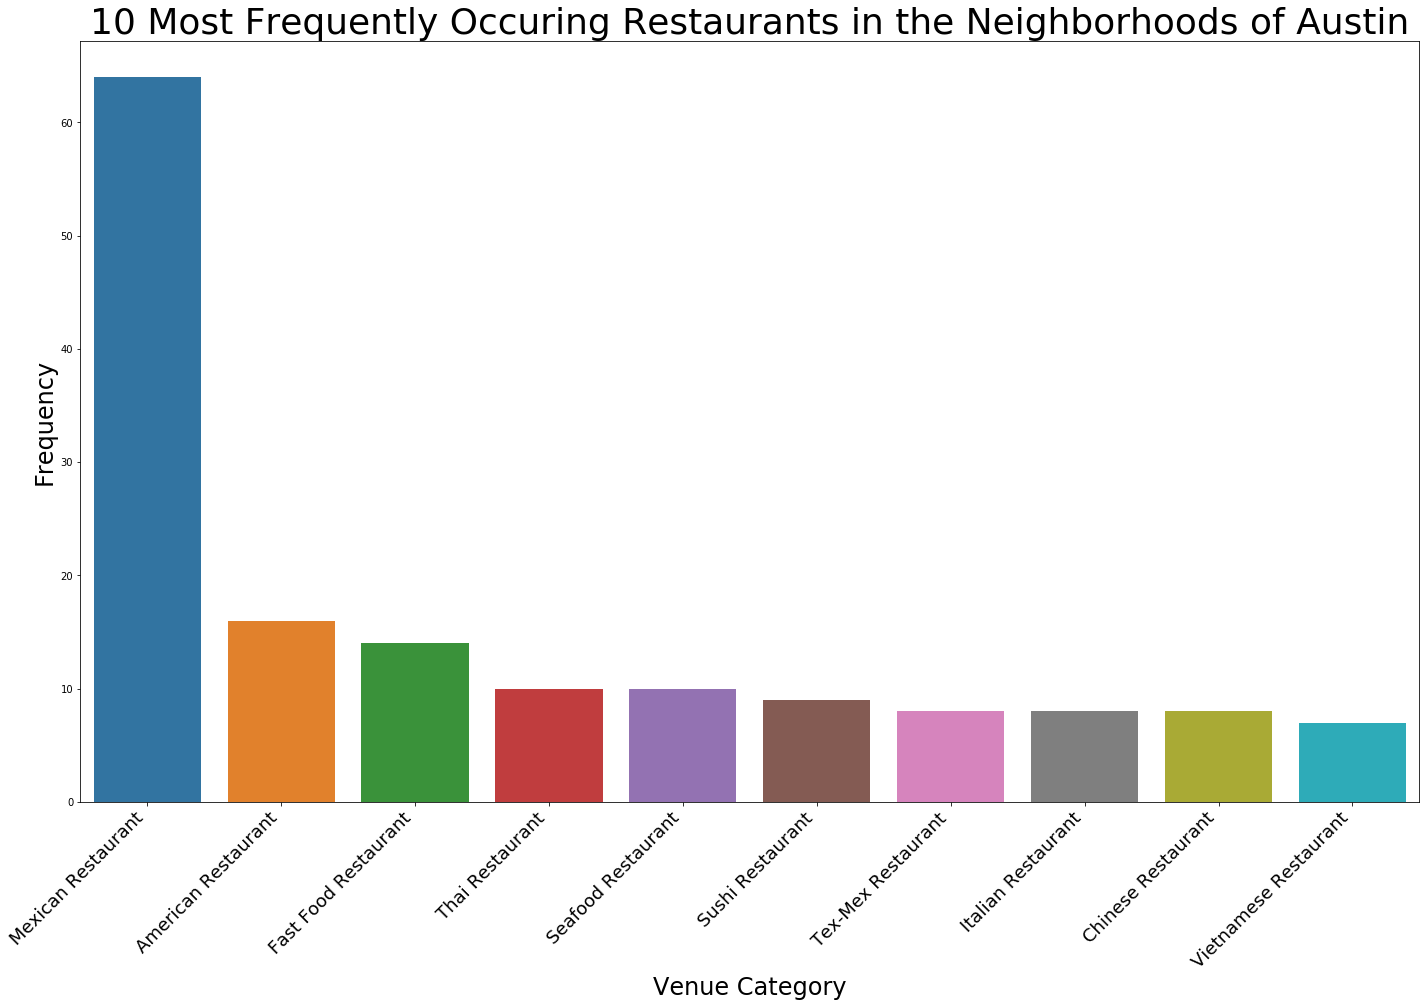

In [31]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Austin_Top_10_Restaurants)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Restaurants in the Neighborhoods of Austin', fontsize= 36)
plt.xlabel("Venue Category", fontsize=24)
plt.ylabel ("Frequency", fontsize=24)
plt.xticks(fontsize=18)
plt.savefig("Most_Freq_Restaurants.png", dpi=300)
plt.rcParams["figure.figsize"] = [24,14]
 
plt.show()

## One Hot Coding

In [32]:
# one hot encoding
Austin_onehot = pd.get_dummies(Austin_restaurants[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Austin_onehot['Neighborhood'] = Austin_restaurants['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Austin_onehot.columns[-1]] + list(Austin_onehot.columns[:-1])
Austin_onehot = Austin_onehot[fixed_columns]

Austin_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Indian Chinese Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,BARTON CREEK MALL,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,BARTON CREEK MALL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,BARTON CREEK MALL,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,BARTON CREEK MALL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,BARTON CREEK MALL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [33]:
# New dataframe size.
Austin_onehot.shape

(212, 32)

### Grouping by neighbourhoods and showing the mean of the frequency of occurrence for each category of restaurants.

In [34]:
Austin_grouped = Austin_onehot.groupby('Neighborhood').mean().reset_index()
Austin_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Indian Chinese Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,New American Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,BARTON CREEK MALL,0.200000,0.000000,0.0,0.200000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.200000,0.000000,0.000000,0.000000
1,CENTRAL EAST AUSTIN,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.181818,0.000000,0.000000,0.090909,0.000000,0.090909,0.090909,0.181818,0.090909,0.090909,0.090909,0.000000,0.090909,0.000000,0.000000,0.000000
2,CORONADO HILLS,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000
3,DAVENPORT--LAKE AUSTIN,0.250000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,DOWNTOWN,0.142857,0.000000,0.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.142857,0.000000
5,EAST CESAR CHAVEZ,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,EAST CONGRESS,0.200000,0.000000,0.0,0.200000,0.000000,0.000000,0.200000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,FOUR POINTS,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,FRANKLIN PARK,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.166667,0.333333,0.000000,0.000000,0.000000,0.000000
9,GALINDO,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.250000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [35]:
Austin_grouped.shape

(54, 32)

## Top Ten Most Common Restaurants Per Neighborhood

In [36]:
num_top_venues = 10

for hood in Austin_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Austin_grouped[Austin_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----BARTON CREEK MALL----
                           venue  freq
0            American Restaurant   0.2
1             Chinese Restaurant   0.2
2                Thai Restaurant   0.2
3               Sushi Restaurant   0.2
4             Mexican Restaurant   0.2
5            Japanese Restaurant   0.0
6  Vegetarian / Vegan Restaurant   0.0
7             Turkish Restaurant   0.0
8             Tex-Mex Restaurant   0.0
9             Seafood Restaurant   0.0


----CENTRAL EAST AUSTIN----
                       venue  freq
0         Italian Restaurant  0.18
1    New American Restaurant  0.18
2            Thai Restaurant  0.09
3           Sushi Restaurant  0.09
4         Seafood Restaurant  0.09
5                 Restaurant  0.09
6  Middle Eastern Restaurant  0.09
7         Mexican Restaurant  0.09
8  Latin American Restaurant  0.09
9        Japanese Restaurant  0.00


----CORONADO HILLS----
                           venue  freq
0             Tex-Mex Restaurant  0.25
1               Sushi Resta

                           venue  freq
0           Fast Food Restaurant   0.5
1             Seafood Restaurant   0.5
2            American Restaurant   0.0
3            Japanese Restaurant   0.0
4  Vegetarian / Vegan Restaurant   0.0
5             Turkish Restaurant   0.0
6                Thai Restaurant   0.0
7             Tex-Mex Restaurant   0.0
8               Sushi Restaurant   0.0
9                     Restaurant   0.0


----MONTOPOLIS----
                           venue  freq
0          Vietnamese Restaurant  0.42
1             Mexican Restaurant  0.33
2            Filipino Restaurant  0.08
3             Seafood Restaurant  0.08
4               Asian Restaurant  0.08
5              Korean Restaurant  0.00
6  Vegetarian / Vegan Restaurant  0.00
7             Turkish Restaurant  0.00
8                Thai Restaurant  0.00
9             Tex-Mex Restaurant  0.00


----MUELLER----
                           venue  freq
0           Fast Food Restaurant  0.50
1                     Res

                           venue  freq
0            American Restaurant  0.33
1             Turkish Restaurant  0.33
2             Mexican Restaurant  0.33
3            Japanese Restaurant  0.00
4  Vegetarian / Vegan Restaurant  0.00
5                Thai Restaurant  0.00
6             Tex-Mex Restaurant  0.00
7               Sushi Restaurant  0.00
8             Seafood Restaurant  0.00
9                     Restaurant  0.00


----ST. EDWARDS----
                           venue  freq
0             Chinese Restaurant   1.0
1            American Restaurant   0.0
2            Japanese Restaurant   0.0
3  Vegetarian / Vegan Restaurant   0.0
4             Turkish Restaurant   0.0
5                Thai Restaurant   0.0
6             Tex-Mex Restaurant   0.0
7               Sushi Restaurant   0.0
8             Seafood Restaurant   0.0
9                     Restaurant   0.0


----ST. JOHN----
                           venue  freq
0             Chinese Restaurant  0.43
1              Korean R

## Create a pandas dataframe of the Top Ten Most Common Restaurants Per Neighborhood

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Austin_grouped['Neighborhood']

for ind in np.arange(Austin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Austin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(30)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BARTON CREEK MALL,American Restaurant,Mexican Restaurant,Thai Restaurant,Sushi Restaurant,Chinese Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,Filipino Restaurant
1,CENTRAL EAST AUSTIN,Italian Restaurant,New American Restaurant,Seafood Restaurant,Latin American Restaurant,Mexican Restaurant,Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Thai Restaurant,Cajun / Creole Restaurant
2,CORONADO HILLS,Mexican Restaurant,Tex-Mex Restaurant,Sushi Restaurant,Seafood Restaurant,Vietnamese Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant
3,DAVENPORT--LAKE AUSTIN,Italian Restaurant,Restaurant,Mexican Restaurant,American Restaurant,Tex-Mex Restaurant,Hawaiian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant
4,DOWNTOWN,American Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Sushi Restaurant,Seafood Restaurant,Latin American Restaurant,Mexican Restaurant,Filipino Restaurant,Greek Restaurant,Gluten-free Restaurant
5,EAST CESAR CHAVEZ,Mexican Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Filipino Restaurant
6,EAST CONGRESS,Mexican Restaurant,American Restaurant,Chinese Restaurant,Fast Food Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Cuban Restaurant,Dim Sum Restaurant,Filipino Restaurant
7,FOUR POINTS,Seafood Restaurant,Mexican Restaurant,Vietnamese Restaurant,Indian Chinese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant
8,FRANKLIN PARK,Mexican Restaurant,Tex-Mex Restaurant,Sushi Restaurant,Vietnamese Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,Filipino Restaurant,Dim Sum Restaurant
9,GALINDO,Italian Restaurant,Seafood Restaurant,New American Restaurant,Fast Food Restaurant,Indian Chinese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant


# Cluster Neighborhoods



### At this juncture, clustering process will be used to identify relationships in our data and to segment the restaurants based on the relationships. Amongst the various clustering algorithms available, we shall use the K means algorithm.

In [39]:
# set number of clusters (I choose 5)
kclusters = 5

Austin_grouped_clustering = Austin_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Austin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 2, 0, 0, 0, 4, 0, 0, 0, 2])

In [40]:
Austin_merged = df
Austin_merged.head(10)

,Neighborhood,latitude,longitude
0,ALLENDALE,29.6855,-95.2132
1,ANDERSON MILL,30.4558,-97.8071
2,AVERY RANCH--LAKELINE,30.4901,-97.8249
3,BARTON CREEK MALL,30.2577,-97.8094
4,BARTON HILLS,30.2532,-97.8207
5,BERGSTROM,30.1975,-97.6685
6,BLUFF SPRINGS,30.1726,-97.7708
7,BOULDIN,30.1726,-97.7708
8,BRENTWOOD,30.3295,-97.7481
9,BRODIE LANE,30.1902,-97.8477


In [41]:
neighborhoods_venues_with_clusters_labels = neighborhoods_venues_sorted

In [42]:
neighborhoods_venues_with_clusters_labels

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BARTON CREEK MALL,American Restaurant,Mexican Restaurant,Thai Restaurant,Sushi Restaurant,Chinese Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,Filipino Restaurant
1,CENTRAL EAST AUSTIN,Italian Restaurant,New American Restaurant,Seafood Restaurant,Latin American Restaurant,Mexican Restaurant,Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Thai Restaurant,Cajun / Creole Restaurant
2,CORONADO HILLS,Mexican Restaurant,Tex-Mex Restaurant,Sushi Restaurant,Seafood Restaurant,Vietnamese Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant
3,DAVENPORT--LAKE AUSTIN,Italian Restaurant,Restaurant,Mexican Restaurant,American Restaurant,Tex-Mex Restaurant,Hawaiian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant
4,DOWNTOWN,American Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Sushi Restaurant,Seafood Restaurant,Latin American Restaurant,Mexican Restaurant,Filipino Restaurant,Greek Restaurant,Gluten-free Restaurant
5,EAST CESAR CHAVEZ,Mexican Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Filipino Restaurant
6,EAST CONGRESS,Mexican Restaurant,American Restaurant,Chinese Restaurant,Fast Food Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Cuban Restaurant,Dim Sum Restaurant,Filipino Restaurant
7,FOUR POINTS,Seafood Restaurant,Mexican Restaurant,Vietnamese Restaurant,Indian Chinese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant
8,FRANKLIN PARK,Mexican Restaurant,Tex-Mex Restaurant,Sushi Restaurant,Vietnamese Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,Filipino Restaurant,Dim Sum Restaurant
9,GALINDO,Italian Restaurant,Seafood Restaurant,New American Restaurant,Fast Food Restaurant,Indian Chinese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant


In [43]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Austin_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Austin_merged = Austin_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')



In [44]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Austin_merged['latitude'],Austin_merged['longitude'],Austin_merged['Neighborhood'], Austin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

## Cluster 1

In [45]:
Austin_merged.loc[Austin_merged['Cluster Labels']==0]

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,BARTON CREEK MALL,30.2577,-97.8094,0.0,American Restaurant,Mexican Restaurant,Thai Restaurant,Sushi Restaurant,Chinese Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,Filipino Restaurant
16,CORONADO HILLS,30.3272,-97.702,0.0,Mexican Restaurant,Tex-Mex Restaurant,Sushi Restaurant,Seafood Restaurant,Vietnamese Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,Filipino Restaurant,Fast Food Restaurant
18,DAVENPORT--LAKE AUSTIN,30.3366,-97.8063,0.0,Italian Restaurant,Restaurant,Mexican Restaurant,American Restaurant,Tex-Mex Restaurant,Hawaiian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant
24,DOWNTOWN,30.2728,-97.761,0.0,American Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Sushi Restaurant,Seafood Restaurant,Latin American Restaurant,Mexican Restaurant,Filipino Restaurant,Greek Restaurant,Gluten-free Restaurant
26,EAST CONGRESS,30.2107,-97.781,0.0,Mexican Restaurant,American Restaurant,Chinese Restaurant,Fast Food Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Cuban Restaurant,Dim Sum Restaurant,Filipino Restaurant
28,FOUR POINTS,30.4038,-97.8711,0.0,Seafood Restaurant,Mexican Restaurant,Vietnamese Restaurant,Indian Chinese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant
29,FRANKLIN PARK,30.1973,-97.7661,0.0,Mexican Restaurant,Tex-Mex Restaurant,Sushi Restaurant,Vietnamese Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,Filipino Restaurant,Dim Sum Restaurant
32,GATEWAY,30.39,-97.7573,0.0,Seafood Restaurant,Mexican Restaurant,Vietnamese Restaurant,Indian Chinese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant
34,GOVALLE,30.2595,-97.7209,0.0,Mexican Restaurant,Fast Food Restaurant,Italian Restaurant,Thai Restaurant,Indian Chinese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant
36,HANCOCK,30.2981,-97.7417,0.0,Thai Restaurant,New American Restaurant,Mexican Restaurant,Fast Food Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,Filipino Restaurant,Vietnamese Restaurant


## Cluster 2

In [46]:
Austin_merged.loc[Austin_merged['Cluster Labels']==1]

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
65,PARKER LANE,30.2231,-97.7487,1.0,American Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
71,ROGERS HILL,30.2814,-97.7137,1.0,Italian Restaurant,American Restaurant,Turkish Restaurant,Indian Chinese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant
72,ROSEDALE,30.3157,-97.7609,1.0,American Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
88,UPPER BOGGY CREEK,30.1859,-97.7728,1.0,American Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant


## Cluster 3

In [47]:
Austin_merged.loc[Austin_merged['Cluster Labels']==2]

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,CENTRAL EAST AUSTIN,30.2706,-97.7415,2.0,Italian Restaurant,New American Restaurant,Seafood Restaurant,Latin American Restaurant,Mexican Restaurant,Restaurant,Middle Eastern Restaurant,Sushi Restaurant,Thai Restaurant,Cajun / Creole Restaurant
30,GALINDO,30.2363,-97.7856,2.0,Italian Restaurant,Seafood Restaurant,New American Restaurant,Fast Food Restaurant,Indian Chinese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant
35,GRACY WOODS,30.3936,-97.7107,2.0,Fast Food Restaurant,Sushi Restaurant,Middle Eastern Restaurant,Vietnamese Restaurant,Indian Chinese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant
39,HERITAGE HILLS,30.3457,-97.7057,2.0,Seafood Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Filipino Restaurant
52,MLK-183,30.283,-97.7091,2.0,Seafood Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Filipino Restaurant
54,MUELLER,30.2985,-97.7183,2.0,Fast Food Restaurant,Mediterranean Restaurant,Restaurant,Mexican Restaurant,Filipino Restaurant,Halal Restaurant,Greek Restaurant,Gluten-free Restaurant,French Restaurant,Vietnamese Restaurant
55,NACA,30.3649,-97.7023,2.0,Halal Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Filipino Restaurant
82,ST. EDWARDS,30.2274,-97.7702,2.0,Chinese Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant
85,TECH RIDGE,30.4092,-97.6833,2.0,Indian Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Filipino Restaurant
87,UNIVERSITY HILLS,30.3112,-97.6889,2.0,Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Filipino Restaurant


## Cluster 4

In [48]:
Austin_merged.loc[Austin_merged['Cluster Labels']==3]

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
63,OLD WEST AUSTIN,30.2944,-97.771,3.0,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Filipino Restaurant
66,OLD WEST AUSTIN,30.2944,-97.771,3.0,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Filipino Restaurant
100,WINDSOR ROAD,30.2936,-97.7672,3.0,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Filipino Restaurant


## Cluster 5

In [49]:
Austin_merged.loc[Austin_merged['Cluster Labels']==4]

,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,EAST CESAR CHAVEZ,30.2567,-97.7473,4.0,Mexican Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Filipino Restaurant
33,GEORGIA ACRES,30.3513,-97.7178,4.0,Mexican Restaurant,Korean Restaurant,Vietnamese Restaurant,Indian Chinese Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant
40,HIGHLAND,30.3341,-97.7328,4.0,Mexican Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Filipino Restaurant
43,HYDE PARK,30.3073,-97.7445,4.0,Mexican Restaurant,American Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Filipino Restaurant
57,NORTH LAMAR,30.3703,-97.7043,4.0,Mexican Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Filipino Restaurant
77,SOUTH LAMAR,30.2381,-97.8002,4.0,Mexican Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Filipino Restaurant
78,SOUTH MANCHACA,30.2194,-97.801,4.0,Mexican Restaurant,Vietnamese Restaurant,Indian Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Chinese Restaurant,Cuban Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Filipino Restaurant


In [50]:
Austin_merged['Cluster Labels'].value_counts()

0.0    29
2.0    12
4.0     7
1.0     4
3.0     3
Name: Cluster Labels, dtype: int64

# Results

The above analysis shows that Cluster 1 has a high concentration of neighborhoods where the restaurant business thrives with Mexican restaurants dominant, closely followed by American restaurant, Cluster 3 has next higher density of neighborhoods with thriving restaurants, and interestingly Cluster 3 has a better blend of restaurant types than Cluster 1, Cluster 5 has a fair share of neighborhoods with restaurants, it can be conviniently be called 'The Mexican Restaurant Cluster' as practically all  the neighborhood have Mexican restaurants as the first most common restaurant, closely folloewd by vietnamese restaurants. Clusters 2 and 4 seem to lag behind in the number of neighborhoods with 4 and 2 neighborhoods respectively.

## Discussion

The above results have far-reaching implications; Cluster 1 with the highest number of neighborhoods with restaurants coincidentally happens to inhabit about 80% of the richest neighborhoods in Austin. Neighborhoods like Downtown with a median household income of $98,49; South River City with a median household income of $83,666; Barton Hill with median household income of $72,514 just to mention a few. Siting  a restauramt in this cluster will be precarious, not only will the potential investor face stiff competition from the already saturated environment but also such an investor must have deep pockets. 

Clusters 3 and 5 provide better promises than cluster 1 for potential investors particularly because they proffer lesser density of neighborhoods with restaurants, though they are also inhabited by high profile neighborhoods such as East Cesar Chavez and South lamar in Cluster 5 with a median household income of $62,881 and $54,142 respectively; Galindo and Central East Austin neighborhoods in Cluster 3 with a median household income of $53,509 and $54,415 respectively. An investor wishng to site a new restaurant in cluster 5 is very likely to face stiff competion if the restaurant type is Mexican or even Vietnamese. The most common anology in the Cluster dataframes is a useful guide in this respect. 

Of all the clusters, cluster 3 is best suited for potential investors for several reasons, firstly it consists of neighborhoods of the median household income class who can afford services of restarants without being too expensive, secondly, the cluster consists of neighborhoods of moderate density that can accomodate new entrants to the industry, and thirdly there is a good blend of restaurant types in the cluster providing an environment that can accommodate almost any restaurant type.

An investor investing in clusters 2 and 4 may experience lower patronage than in the other clusters, however these neighborhoods may be suitable for startups who may not be not be able to weather the storm of competition.

Seasoned investors who are competition savvy and have deep pockets can still make tremendous in-roadsin Cluster 1

This project has some limitations particularly in sourcing recent datasets dealing with neighborhoods in Austin, such data as the average cost of housing units per neighborhood, the average rent per neighborhood, the crime rate per neighborhood and demographic data such as number family households per neighborhood, gender distribution, age distribution. Where some of these datasets are available they are not recent and often expressed per zipcode rather than per neighborhood names that are readily understandable to the average user. 

We wish to recommend that   data scientist take the limitations expressed here as a challenge and fill up the gap, we also wish to recommend to organizations engaging in dataset design and development to consider expressing datasets per neighborhood in addition to per zipcode

# Conclusion

This project is a veritable tool to guide investors in the restaurant, despite the limitations described in the last paragraph, its efficacy as a guide to potential invetors cannot be undermined. This project is a work in progress  and we intend to make it more robust in the very near future.

 # References

Jimmy Im,
These are the 10 best places to live in the US in 2019,
[online],
Published Mon, Apr 15 20193:34 PM EDT
Updated Mon, Apr 29 201912:42 PM EDT
https://www.cnbc.com/2019/04/15/us-news-world-report-best-places-to-live-in-the-us-in-2019.html

Chris Kolmar,
Richest Neighborhoods In Austin, TX For 2020,
[online],
January 12, 2020,
https://www.homesnacks.net/richest-neighborhoods-in-austin-128966/